In [10]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Conv2D, MaxPooling2D, Input, Activation, Dropout
from keras.layers import Add, Flatten, AveragePooling2D, Dense, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
import time
from keras.models import Sequential

In [11]:
#set width and heigt of the input
w = 32
h = 32
#set the number of epochs
epochs = 10

#open log file to dump progress data
f = open('log_flickr_vgg16_32x32.txt','w')

In [12]:
#instantiate a sequential model
model = Sequential()
#Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
#Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
#Block 3
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
#Block 4
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
#Block 5
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#Flatten
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
#The last Fully connected layers contribute the least hence removing it
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
summary =model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
__________

In [13]:
base_path = '/floyd/input/flickrdataset'
train_dir = base_path+'/train/'
validation_dir = base_path+'/validation/'
test_dir = base_path+'/test/'

In [14]:
#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), 
        batch_size=20, 
        class_mode='categorical')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [15]:
sgd = optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=True)
#model.compile(optimizer=optimizers.SGD(lr=1e-4),
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 8s 79ms/step - loss: 2.2406 - acc: 0.1600 - val_loss: 2.5125 - val_acc: 0.2200
Epoch 2/10
100/100 [==============================] - 7s 68ms/step - loss: 2.0619 - acc: 0.2430 - val_loss: 2.3920 - val_acc: 0.1550
Epoch 3/10
100/100 [==============================] - 7s 67ms/step - loss: 1.9687 - acc: 0.2830 - val_loss: 2.1484 - val_acc: 0.2150
Epoch 4/10
100/100 [==============================] - 7s 67ms/step - loss: 1.8873 - acc: 0.3295 - val_loss: 2.8937 - val_acc: 0.2250
Epoch 5/10
100/100 [==============================] - 7s 67ms/step - loss: 1.8179 - acc: 0.3460 - val_loss: 2.1614 - val_acc: 0.1900
Epoch 6/10
100/100 [==============================] - 7s 68ms/step - loss: 1.6492 - acc: 0.4175 - val_loss: 2.7843 - val_acc: 0.1950
Epoch 7/10
100/100 [==============================] - 7s 68ms/step - loss: 1.5503 - acc: 0.4555 - val_loss: 2.7288 - val_acc: 0.3200
Epoch 8/10
100/100 [==============================] - 7s 67ms/step - 

[0.1600000026077032, 0.2430000027641654, 0.2830000026896596, 0.3295000012218952, 0.3460000017285347, 0.41750000067055226, 0.4555000014603138, 0.47900000393390657, 0.5110000030696392, 0.5570000028610229]


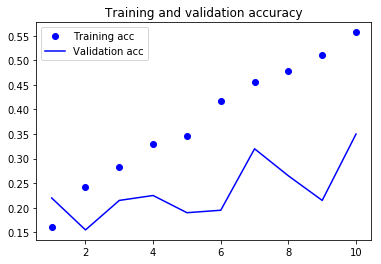

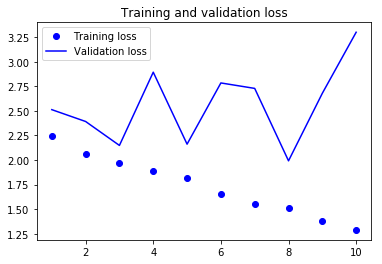

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc)
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator)

Found 200 images belonging to 10 classes.


In [18]:
print(test_loss, test_acc)

3.056087112426758 0.2949999988079071
